# HWDP

$ x = \frac{\sqrt{z}}{y} $

In [1]:
import pandas as pd
import re
import numpy as np

In [2]:
db= pd.read_csv(r'filtered_data.csv')

In [3]:
db.head()

,Unnamed: 0,Event,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,Game
0,0,Rated Bullet game,0-1,1079,1071,-30,10,B00,Owen Defense,60+0,Time forfeit,1. e4 { [%eval 0.12] [%clk 0:01:00] } 1... b6?...
1,1,Rated Blitz game,0-1,1888,1796,-13,13,C62,Ruy Lopez: Steinitz Defense,300+0,Normal,1. e4 { [%eval 0.12] [%clk 0:05:00] } 1... e5 ...
2,2,Rated Rapid game,0-1,1090,1156,-9,11,B20,Sicilian Defense,600+0,Normal,1. e4 { [%eval 0.12] [%clk 0:10:00] } 1... c5 ...
3,3,Rated Bullet game,0-1,1091,1184,-8,9,C20,"King's Pawn Game: Wayward Queen Attack, Kiddie...",60+0,Time forfeit,1. e4 { [%eval 0.12] [%clk 0:01:00] } 1... e5 ...
4,4,Rated Classical game,1-0,1672,1699,11,-11,C64,"Ruy Lopez: Classical Variation, Central Variation",900+15,Normal,1. e4 { [%eval 0.12] [%clk 0:15:00] } 1... e5 ...


In [4]:
db.describe()

,Unnamed: 0,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff
count,31461.000000,31461.000000,31461.000000,31461.000000,31461.000000
mean,15730.000000,1503.446903,1503.921967,4.022536,2.654684
std,9082.152746,321.223393,320.695908,30.933538,29.354305
min,0.000000,800.000000,800.000000,-437.000000,-615.000000
25%,7865.000000,1266.000000,1267.000000,-10.000000,-10.000000
50%,15730.000000,1500.000000,1500.000000,3.000000,-2.000000
75%,23595.000000,1725.000000,1724.000000,11.000000,11.000000
max,31460.000000,2748.000000,2667.000000,460.000000,598.000000


In [34]:
# domyślnie bez [:5]
a = db.Game
# a.to_csv('file.csv', encoding='utf-8')
a
# TODO: find good, bad moves in notation
# https://en.wikipedia.org/wiki/Chess_annotation_symbols

0        1. e4 { [%eval 0.12] [%clk 0:01:00] } 1... b6?...
1        1. e4 { [%eval 0.12] [%clk 0:05:00] } 1... e5 ...
2        1. e4 { [%eval 0.12] [%clk 0:10:00] } 1... c5 ...
3        1. e4 { [%eval 0.12] [%clk 0:01:00] } 1... e5 ...
4        1. e4 { [%eval 0.12] [%clk 0:15:00] } 1... e5 ...
                               ...                        
31456    1. d4 { [%eval 0.25] [%clk 0:05:00] } 1... d5 ...
31457    1. e4 { [%eval 0.12] [%clk 0:10:00] } 1... e5 ...
31458    1. e4 { [%eval 0.12] [%clk 0:10:00] } 1... e5 ...
31459    1. e4 { [%eval 0.12] [%clk 0:10:00] } 1... e5 ...
31460    1. c4 { [%eval 0.1] [%clk 0:02:00] } 1... e5 {...
Name: Game, Length: 31461, dtype: object

In [30]:
def time_to_sec(hhmmss):
    return sum(x * int(t) for x, t in zip([3600, 60, 1], hhmmss.split(":")))

def derivative(value_list, step=1, reversed=False):
    v_copy = [it for it in value_list]
    for i in range(len(v_copy)-1, -1, -1):
        if i in np.arange(step):
            v_copy[i] = 0
        if i >= step:
            try:
                v_copy[i] = round(v_copy[i] - v_copy[i-step], 2)
            except TypeError:
                pass
    if reversed:
        v_copy = [-1 * it for it in v_copy]
    return v_copy

def score_name(string: str) -> str:
    if '??' in string:
        return 'blunder'
    elif '?!' in string:
        return 'dubious move'
    elif '!?' in string:
        return 'interesting move'
    elif '!!' in string:
        return 'brilliant move'
    elif '?' in string:
        return 'mistake'
    elif '!' in string:
        return 'good move'
    else:
        return '0'

In [38]:
# na razie na a[0] -> zrobić fora dla wszystkich
# ev = re.findall(r"\%eval (.*?)\]",a[0])
# ev = [float(it) for it in ev]
#
# t_left = re.findall(r"\%clk (.*?)\]",a[0])
# t_left = [time_to_sec(it) for it in t_left]
#
# d_t = derivative(t_left, step=2, reversed=True)
# d_ev = [round(it,2) for it in derivative(ev, step=1, reversed=False)]
# ev
all_ev = []
all_d_ev = []
all_t_left = []
all_d_t = []
score = []

for j in range(len(a)):
    if j % 1000 == 0:
        print(j / 1000)
    # score find
    sc = re.findall(r"\. (.*?)\] }",a[j])
    for i in range(len(sc)):
        sc[i] = score_name(sc[i])
    # eval find
    # ev = re.findall(r"\%eval (.*?)\]",a[j])
    # for i in range(len(ev)):
    #     try:
    #         ev[i] = round(float(ev[i]),2)
    #     except ValueError:
    #         pass
    score.append(sc)
    # all_ev.append(ev)
    # time find
    t_left = re.findall(r"\%clk (.*?)\]",a[j])
    t_left = [time_to_sec(it) for it in t_left]
    all_t_left.append(t_left)
    all_d_t.append(derivative(t_left, step=2, reversed=True))
    # all_d_ev.append(derivative(ev, step=1, reversed=False))


0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0


[['0', 'dubious move', '0', '0', '0', '0', '0', '0', '0', '0', 'dubious move', '0', '0', '0', 'blunder', '0', '0', '0', 'dubious move', '0', 'mistake', '0', 'dubious move', '0', '0', '0', '0', '0', '0', '0', '0', '0', 'mistake', 'mistake', '0', 'dubious move', 'dubious move', 'dubious move', '0', 'dubious move', '0', '0', 'mistake', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 'dubious move', '0', '0', 'mistake', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 'mistake', '0', '0', '0', '0', 'dubious move', 'dubious move', '0', 'mistake', '0', 'dubious move', '0', 'mistake', '0', '0', '0', '0', '0', 'mistake', '0', 'blunder', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 'dubious move', '0', '0', '0', '0', '0', '0', 'mistake', '0', '0', 'dubious move', '0', '0', '0', 'blunder', '0', 'mistake', '0', '0', '0', '0', 'mistake', 'mistake', '0', 'mistake', '0'

In [39]:
# db['Eval'] = all_ev
# db['Eval_change'] = all_d_ev
db['Time'] = all_t_left
db['Time_change'] = all_d_t
db['Score'] = score

In [37]:
db.head(1)


,Unnamed: 0,Event,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,Game,Eval,Eval_change,Time,Time_change,Score
0,0,Rated Bullet game,0-1,1079,1071,-30,10,B00,Owen Defense,60+0,Time forfeit,1. e4 { [%eval 0.12] [%clk 0:01:00] } 1... b6?...,"[0.12, 0.62, 0.64, 0.62, 0.47, 0.54, 0.27, 0.6...","[0, 0.5, 0.02, -0.02, -0.15, 0.07, -0.27, 0.41...","[60, 60, 57, 60, 57, 60, 55, 57, 51, 55, 48, 5...","[0, 0, 3, 0, 0, 0, 2, 3, 4, 2, 3, 1, 2, 1, 1, ...","[0, dubious move, 0, 0, 0, 0, 0, 0, 0, 0, dubi..."


In [ ]:
# TODO: zmienić: prawdopodobieństwo wykonania ruchu danego typu
# czyli zostawić nieblundery też, usunąć if it[0] != '0'



moves = pd.DataFrame()
for i in range(len(db)):
    if i % 1000 == 0:
        print(i / 1000)
    zip_values = [ it for it in zip(db.iloc[i,-1],db.iloc[i,-2])] #  if it[0] != '0'
    n = len(zip_values)
    moves = pd.concat([moves,
                       pd.DataFrame(
                       {'score': [it[0] for it in zip_values],
                        'delta_time': [it[1] for it in zip_values],
                        'WhiteElo': [db.iloc[i,3]] * n,
                        'BlackElo': [db.iloc[i,4]] * n,
                        'WhiteRatingDiff': [db.iloc[i,5]] * n,
                        'TimeControl': [db.iloc[i,9]] * n
                        })]
                      ,ignore_index=True)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0


In [ ]:
moves.to_csv(r'C:\Users\piotr\OneDrive\Documents\GitHub\Chess\dane\moves.csv', mode='w')

In [11]:
db.to_csv(r'C:\Users\piotr\OneDrive\Documents\GitHub\Chess\dane\filtered_data_wt_eval.csv', mode='w')

<AxesSubplot:>

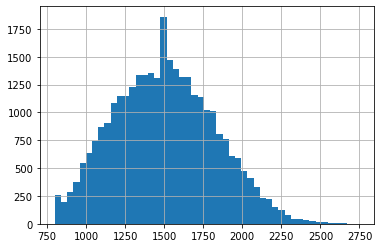

In [12]:
db.WhiteElo.hist(bins=49)

<AxesSubplot:>

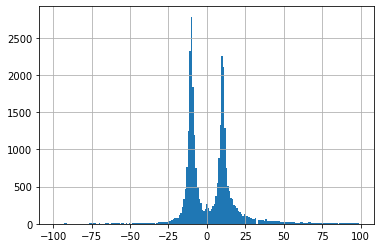

In [13]:
db.WhiteRatingDiff[(db.WhiteRatingDiff > -100) & (db.WhiteRatingDiff <100)].hist(bins=201)

<AxesSubplot:>

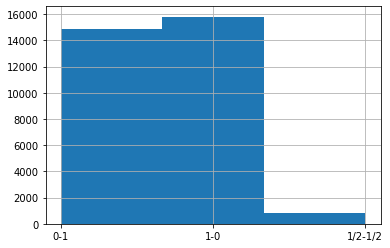

In [14]:
db.Result.hist(bins=3)

In [15]:
a = 'asd1 asd alsd ;asdf'
a.count('asd')

3

In [16]:
# 5+0 format
format_5 = db[db['TimeControl'] == '300+0']
for item in format_5.loc[:30,'Eval_change']:
    print(item)

[0, 0.25, -0.14, -0.08, 0.28, 0.01, -0.07, -0.07, 0.23, 0.19, -0.21, 0.06, -0.2, 0.62, 0.45, 0.1, -1.03, -0.03, -0.06, 0.09, -0.07, -0.02, -0.19, 0.46, 0.11, -0.07, -0.17, 0.04, -1.05, 0.45, -0.37, -0.17, -0.12, 0.97, -0.84, 0.04, -1.0, 0.18, -0.92, 0.21, -1.79, 0.19, -0.26, 0.07, 0.04, 0.07, -1.95, 1.17, -5.16, 0.0, 0.04, 0.03, 0.02, 0.05, 0.03, 0.2]
[0, 0.25, -0.14, -0.08, 0.06, 0.25, -0.1, 0.02, 0.1, -0.12, 0.02, 0.2, -0.04, -0.22, 0.28, 0.65, -0.59, 0.02, -0.38, 0.04, 0.03, -0.07, -0.51, 0.19, -0.39, 0.58, 0.06, 0.2, 0.12, 0.97, -0.1, 0.53, -1.95, 2.13, -2.04, 0.02, -0.11, 0.0, 0.0, -0.29, -1.71, 0.1, -2.57, 0.18, -6.71, 0.29, 0.88, 2.8, -0.42, 4.4, -57.74, 53.06, -5.38, 10.75, '#-12', '#-11', '#-11', '#-10', '#-6', '#-10', '#-10', -7.39, '#-7', '#-6', '#-2', '#-1', '#-1']


In [17]:
for item in format_5.loc[:30,'Time_change']:
    print(item)

[0, 0, 2, 1, 1, 2, 1, 1, 7, 1, 2, 2, 0, 1, 1, 1, 2, 1, 1, 3, 7, 0, 3, 1, 10, 4, 9, 2, 20, 5, 7, 2, 51, 20, 7, 11, 47, 59, 50, 8, 22, 2, 0, 13, 13, 17, 7, 7, 7, 16, 5, 2, 1, 0, 1, 1]
[0, 0, 1, 1, 0, 1, 1, 3, 5, 5, 2, 8, 8, 0, 6, 18, 2, 0, 2, 5, 11, 0, 10, 4, 7, 16, 9, 2, 5, 7, 8, 5, 14, 3, 2, 4, 3, 7, 12, 15, 4, 2, 8, 13, 20, 4, 2, 2, 3, 46, 8, 7, 23, 2, 16, 7, 4, 16, 8, 4, 5, 6, 3, 3, 22, 2, 4, 3]


In [18]:
format_5.loc[:30,'Time_change']


1     [0, 0, 2, 1, 1, 2, 1, 1, 7, 1, 2, 2, 0, 1, 1, ...
20    [0, 0, 1, 1, 0, 1, 1, 3, 5, 5, 2, 8, 8, 0, 6, ...
Name: Time_change, dtype: object

[(1, 'a'), (2, 'b'), (3, 'a'), (4, 'b')]